In [1]:
import matplotlib.pyplot as plt
import os
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

from refactored_utils import *

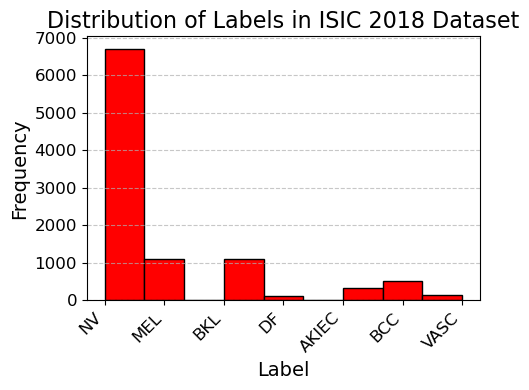

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
DATASET_DIR = 'datasets'
csv_file = os.path.join(DATASET_DIR, 'ISIC2018_Task3_Training_GroundTruth.csv')
df = pd.read_csv(csv_file)

# Assign the label for each entry
df['label'] = df[df.columns[1:]].idxmax(axis=1)

# Get the labels list
labels = df['label'].tolist()

# Create a histogram
plt.figure(figsize=(5, 4))
plt.hist(df['label'], bins=9, color='red', edgecolor='black')

# Customize the plot
plt.title('Distribution of Labels in ISIC 2018 Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


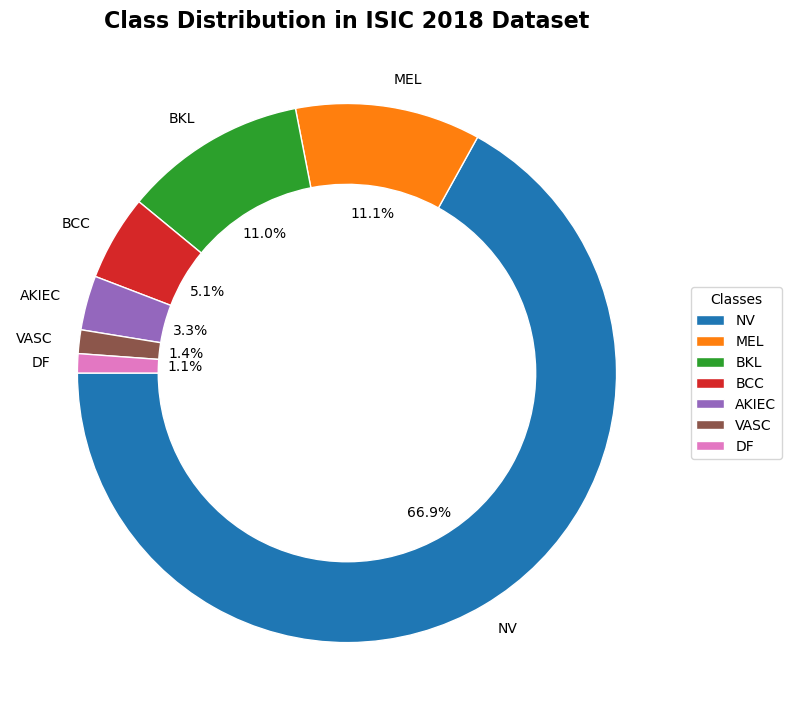

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, professional color palette

# Load the dataset
DATASET_DIR = 'datasets'
csv_file = os.path.join(DATASET_DIR, 'ISIC2018_Task3_Training_GroundTruth.csv')
df = pd.read_csv(csv_file)

# Assign the label for each entry
df['label'] = df[df.columns[1:]].idxmax(axis=1)

# Get the count of each label
label_counts = df['label'].value_counts()

# Create a color palette with distinct, appealing colors
# Using a custom color palette that's color-blind friendly
custom_colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct='%1.1f%%', 
    startangle=180,
    colors=custom_colors[:len(label_counts)],  # Use only as many colors as needed
    wedgeprops={'width': 0.3, 'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 10}
)

# Customize the plot
plt.title('Class Distribution in ISIC 2018 Dataset', fontsize=16, fontweight='bold')

# Add a subtle legend
plt.legend(
    label_counts.index, 
    title="Classes", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5)
)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Display the plot
plt.show()

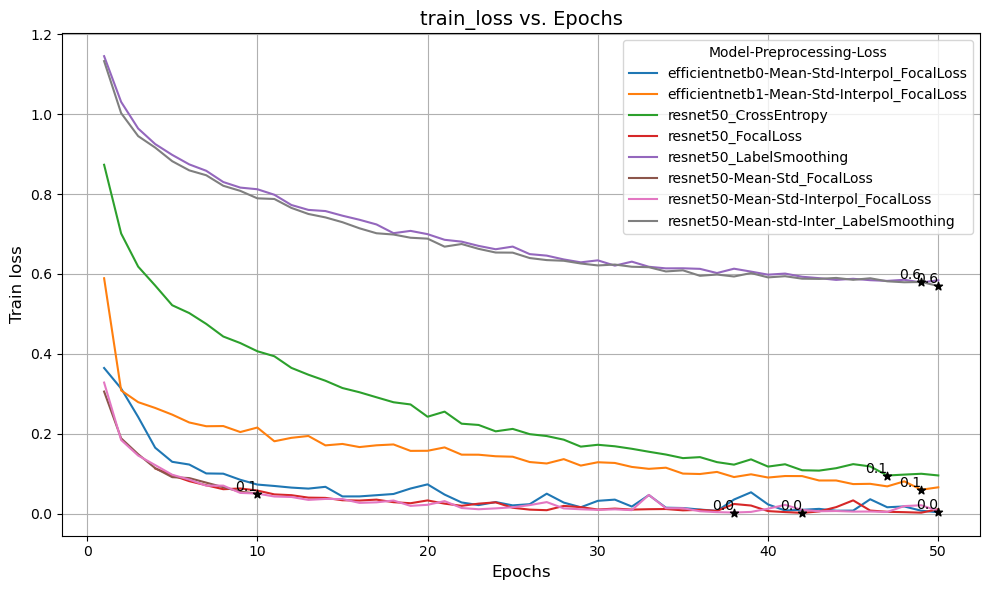

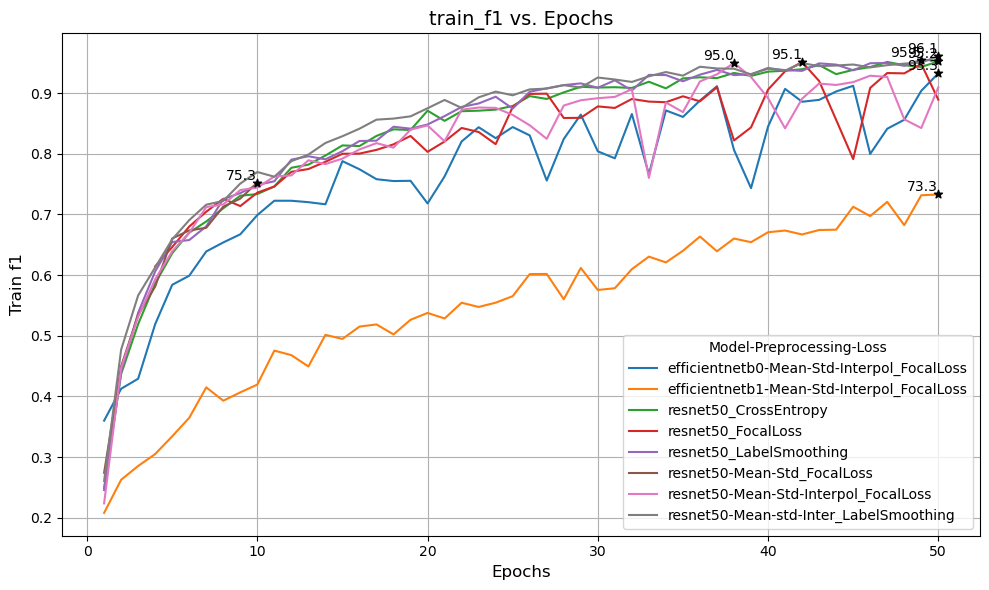

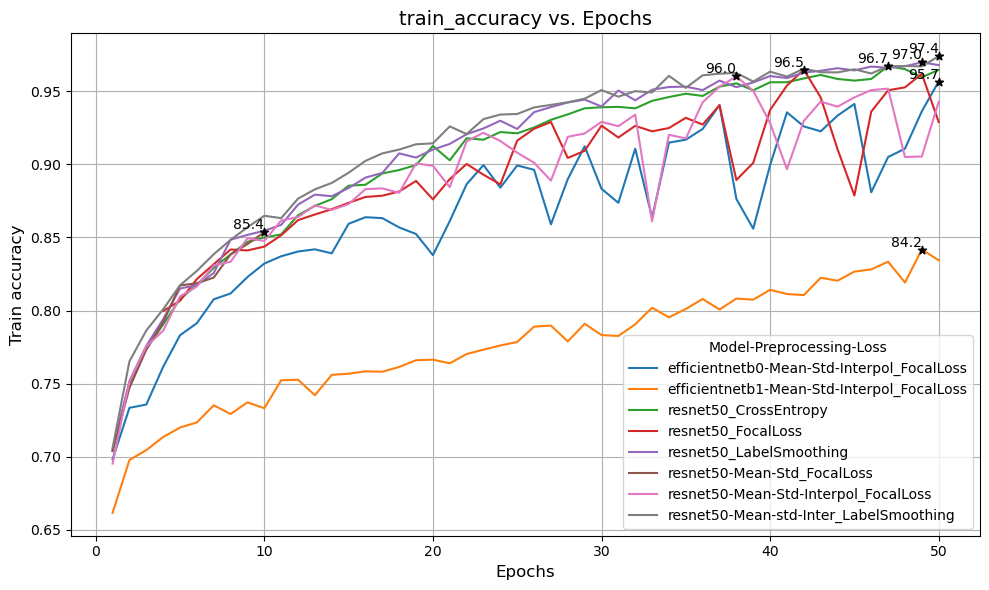

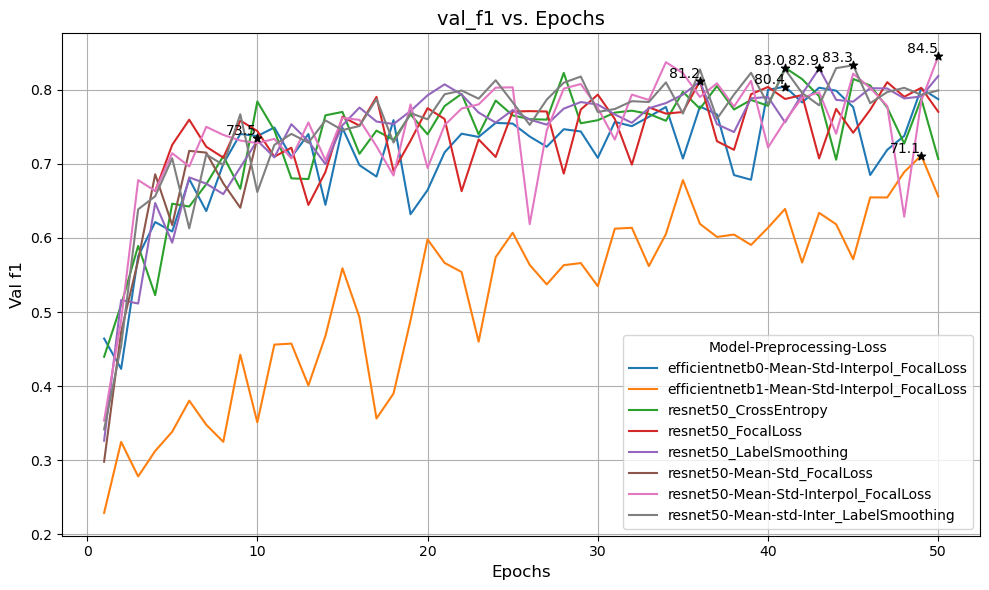

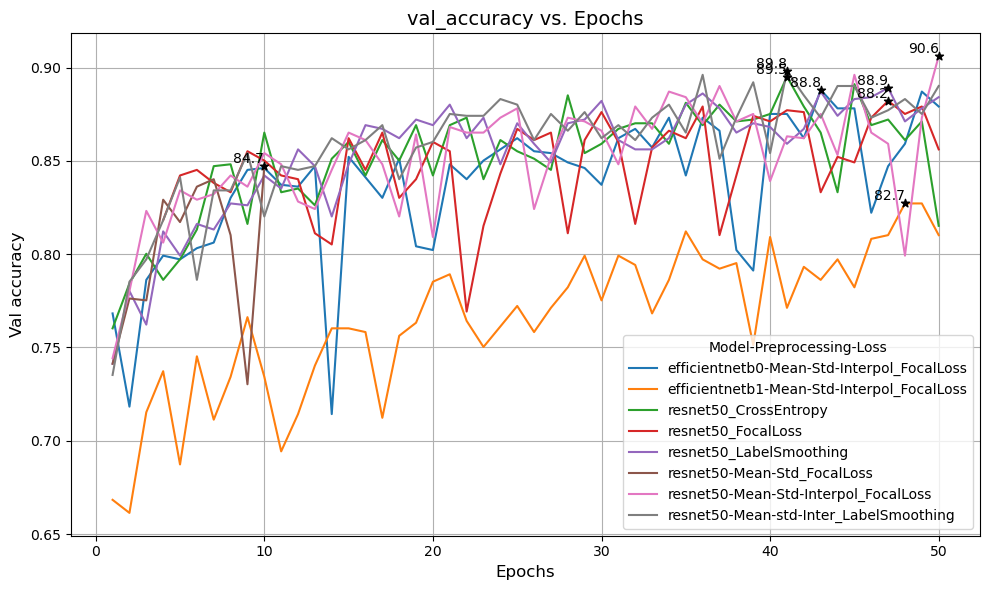

In [ ]:

# Define root directory to look for CSV files
root_dir = './'

# Define metrics to plot (excluding Test_f1 and Test_acc from line plots)
metrics = ['train_loss', 'train_f1', 'train_accuracy', 'val_f1', 'val_accuracy']
test_metrics = ['Test_f1', 'Test_acc']  # Single-value metrics

# Collect all CSV files from subdirectories
csv_files = glob.glob(os.path.join(root_dir, '**', '*.csv'), recursive=True)

# Plot each metric across all loss functions for epoch-based metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for file_path in csv_files:
        # Ignore irrelevant files
        if 'triplet_' in file_path or 'results' not in file_path:
            continue
        
        # Load CSV file and extract relevant part of the file name
        df = pd.read_csv(file_path)
        name_parts = os.path.basename(file_path).split('_')
        name = name_parts[1] + "_" + name_parts[2]  # e.g., "resnet50_CrossEntropy"

        # Plot the metric across epochs
        plt.plot(df['epoch'], df[metric], label=name)
        value = df[metric].max() if metric != 'train_loss' else df[metric].min()
        text_value = value*100 if metric != 'train_loss' else value
        max_epoch = df[df[metric] == value]['epoch'].values[0]
        plt.scatter(max_epoch, value, marker='*', color='black', zorder=3)
        plt.text(max_epoch, value, f'{text_value:.1f}', color='black', ha='right', va='bottom')


    plt.title(f"{metric} vs. Epochs", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel(metric.replace('_', ' ').capitalize(), fontsize=12)
    plt.legend(title="Model-Preprocessing-Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Test_f1 and Test_acc as bar charts
test_results = {'Model': [], 'Test_f1': [], 'Test_acc': []}

# Collect final test results for each model
for file_path in csv_files:
    # Ignore irrelevant files
    if 'triplet_' in file_path or 'results' not in file_path:
        continue
    
    # Load CSV file and extract relevant part of the file name
    df = pd.read_csv(file_path)
    name_parts = os.path.basename(file_path).split('_')
    name = name_parts[1] + "_" + name_parts[2]  # e.g., "resnet50_CrossEntropy"
    
    # Extract the single-value test metrics (from the first row)
    test_results['Model'].append(name)
    test_results['Test_f1'].append(df['Test_f1'].iloc[0])
    test_results['Test_acc'].append(df['Test_acc'].iloc[0])


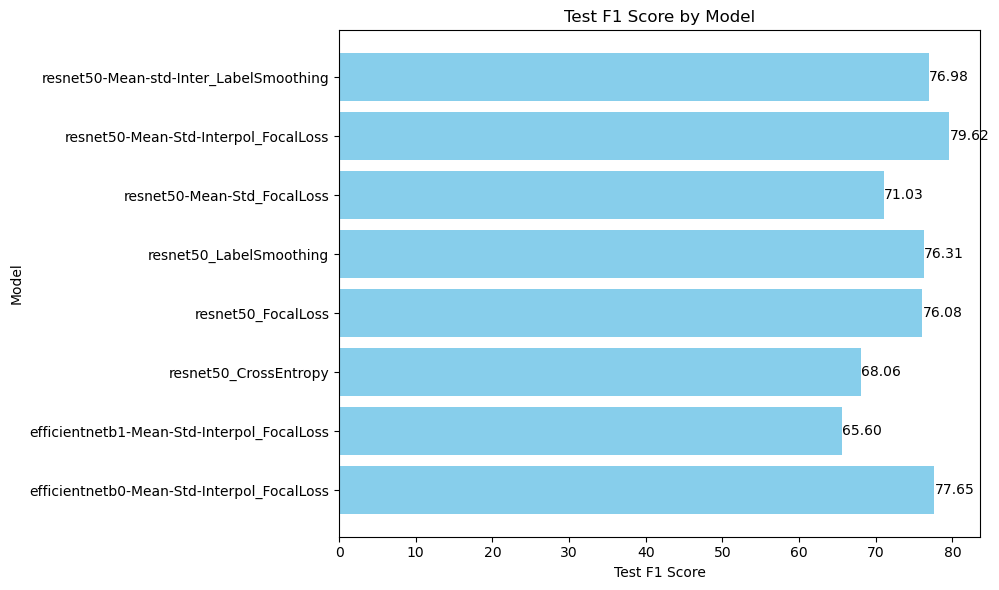

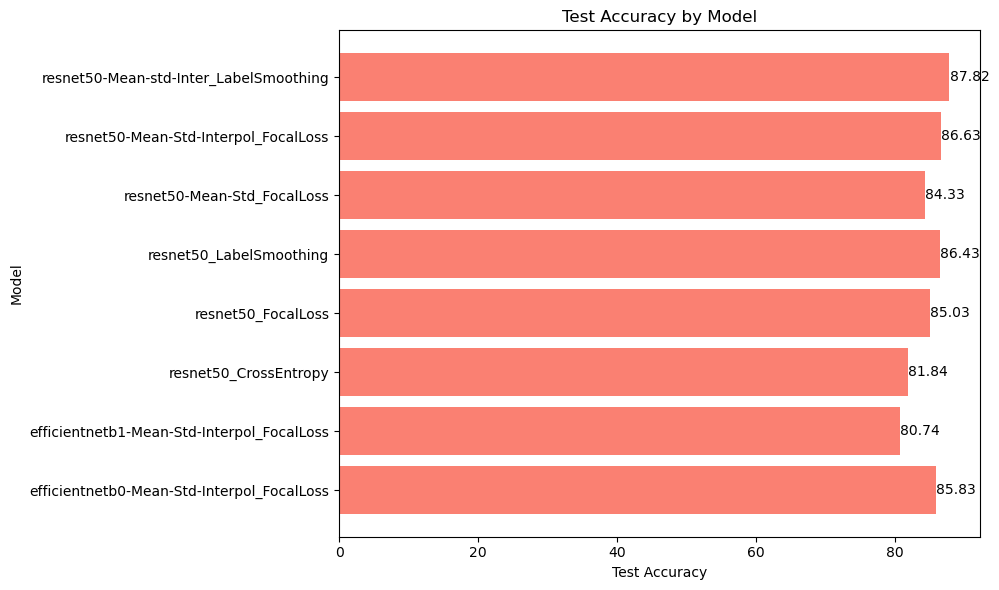

In [38]:

# Convert to DataFrame for easy plotting
test_df = pd.DataFrame(test_results)
# Plot Test_f1
plt.figure(figsize=(10, 6))
bars = plt.barh(test_df['Model'], test_df['Test_f1']*100, color='skyblue')
plt.title("Test F1 Score by Model")
plt.xlabel("Test F1 Score")
plt.ylabel("Model")
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')

plt.show()

# Plot Test_acc
plt.figure(figsize=(10, 6))
bars = plt.barh(test_df['Model'], test_df['Test_acc']*100, color='salmon')
plt.title("Test Accuracy by Model")
plt.xlabel("Test Accuracy")
plt.ylabel("Model")
plt.tight_layout()

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')

plt.show()


Siamese Network

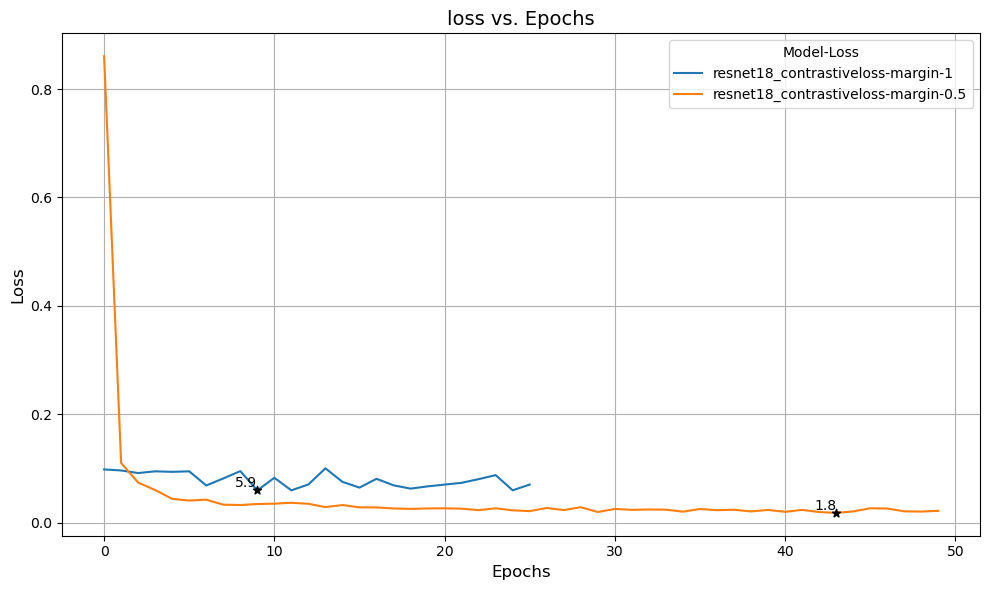

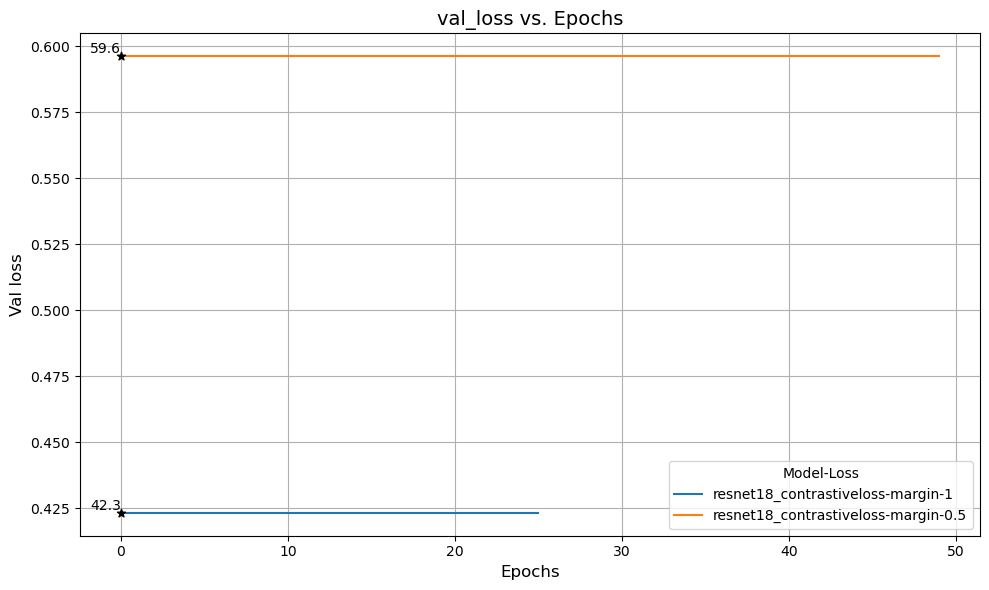

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define root directory to look for CSV files
root_dir = './'

# Define metrics to plot (excluding Test_f1 and Test_acc from line plots)
metrics = ['loss', 'val_loss']
test_metrics = ['Test_f1', 'Test_acc']  # Single-value metrics

# Collect all CSV files from subdirectories
csv_files = glob.glob(os.path.join(root_dir, '**', '*.csv'), recursive=True)

# Plot each metric across all loss functions for epoch-based metrics
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for file_path in csv_files:
        # Ignore irrelevant files
        if 'triplet_' not in file_path or'results' not in file_path:
            continue
        
        # Load CSV file and extract relevant part of the file name
        df = pd.read_csv(file_path)
        name_parts = os.path.basename(file_path).split('_')
        name = name_parts[1] + "_" + name_parts[2]  # e.g., "resnet50_CrossEntropy"
        df['epoch'] = list(range(df.shape[0]))
        # Plot the metric across epochs
        plt.plot(df['epoch'], df[metric], label=name)
        value = df[metric].min()
        text_value = value*100 if metric != 'train_loss' else value
        max_epoch = df[df[metric] == value]['epoch'].values[0]

        plt.scatter(max_epoch, value, marker='*', color='black', zorder=3)
        plt.text(max_epoch, value, f'{text_value:.1f}', color='black', ha='right', va='bottom')


    plt.title(f"{metric} vs. Epochs", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel(metric.replace('_', ' ').capitalize(), fontsize=12)
    plt.legend(title="Model-Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()